In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pickle

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020914927..0.8682196].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.045716763..0.86523527].


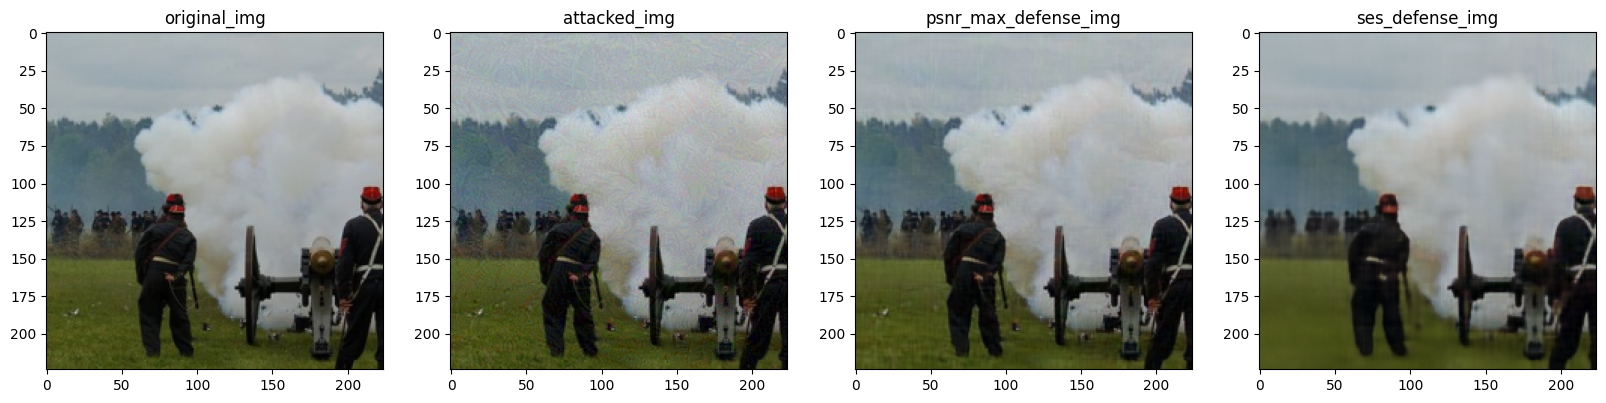

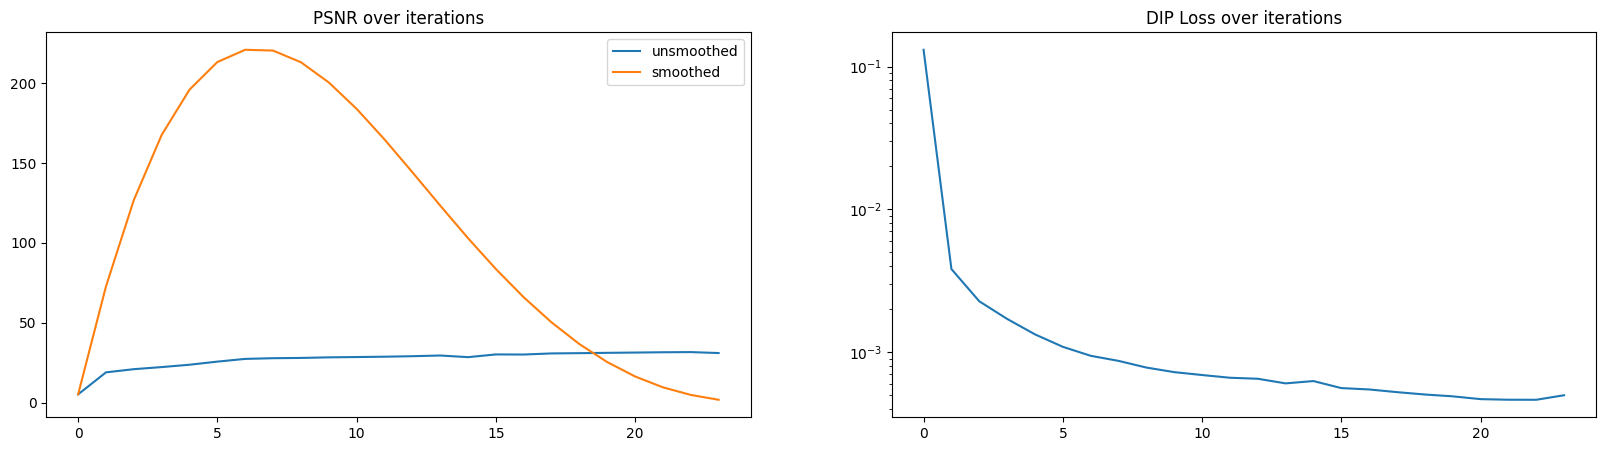

{'original_img': [[471, 744, 657, 856, 847]], 'attacked_img': [[404, 908, 812, 405, 895]], 'psnr_max_defense_img': [[404, 908, 895, 657, 812]], 'ses_defense_img': [[471, 974, 895, 657, 847]]}


In [24]:
file_name = "/home/bransthr/projects/aip-florian7/bransthr/DIPDefend/script_logpoint_no_ewc/attack_2_status.pt"
with open(file_name, "rb") as f:
    another_attack_data = torch.load(f, map_location="cpu", weights_only=False)
f.close()
diagnose_dip_defend(another_attack_data)

In [28]:
cumulative_training_losses = [
    [] for _ in range(8)
]
for attack_num in range(8):
    file_name = f"/home/bransthr/projects/aip-florian7/bransthr/DIPDefend/script_logpoint_no_ewc/attack_{attack_num}_status.pt"
    with open(file_name, "rb") as f:
        curr_data = torch.load(f, map_location="cpu", weights_only=False)
        cumulative_training_losses[attack_num].extend(curr_data["defense_info"]['dip_losses'])
        if "past_example_losses" in curr_data['defense_info']:
            for past_idx, past_losses in enumerate(curr_data['defense_info']['past_example_losses']):
                cumulative_training_losses[past_idx].extend(past_losses)
    f.close()

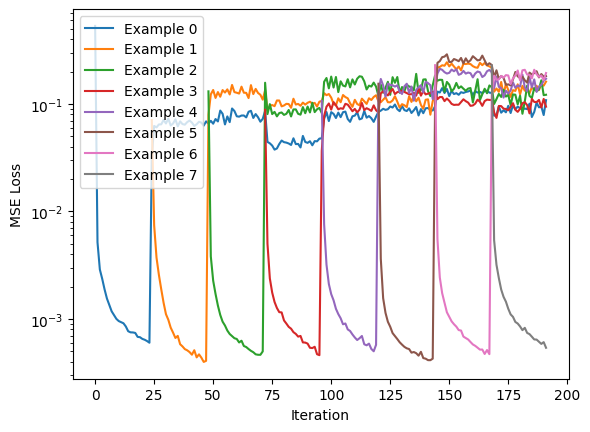

In [29]:
fig, ax = plt.subplots()
longest_attack_length = max(len(losses) for losses in cumulative_training_losses)
for attack_num in range(8):
    losses_to_plot = torch.tensor(cumulative_training_losses[attack_num]).numpy()
    ax.plot(
        np.arange(longest_attack_length - len(losses_to_plot), longest_attack_length),
        losses_to_plot,
        label=f"Example {attack_num}"
    )
ax.set_xlabel("Iteration")
ax.set_ylabel("MSE Loss")
ax.set_yscale("log")
ax.legend()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020802014..1.0224822].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.008234724..1.03469].


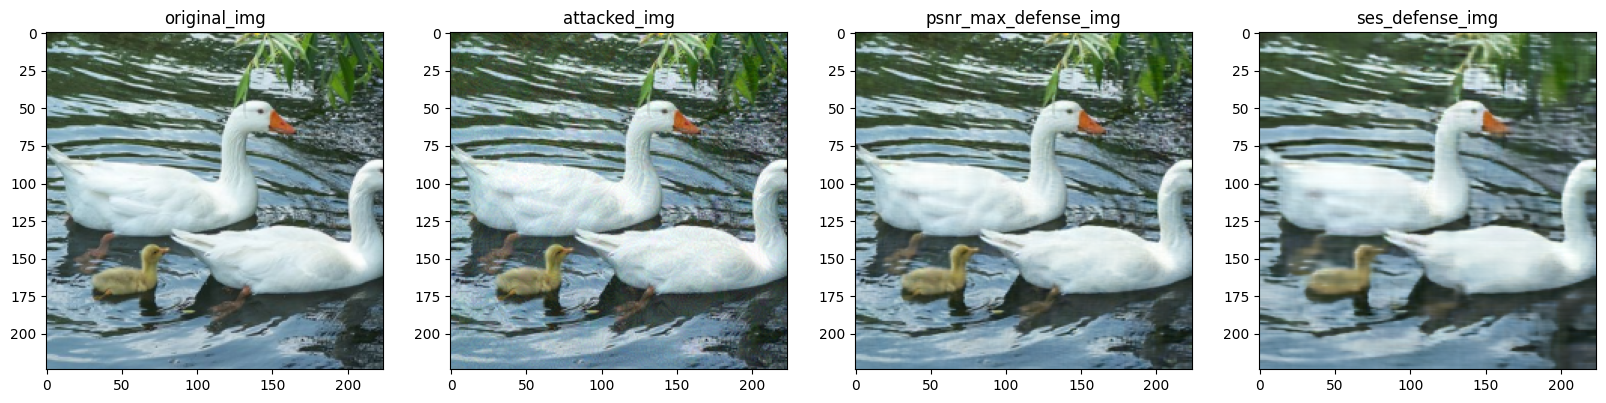

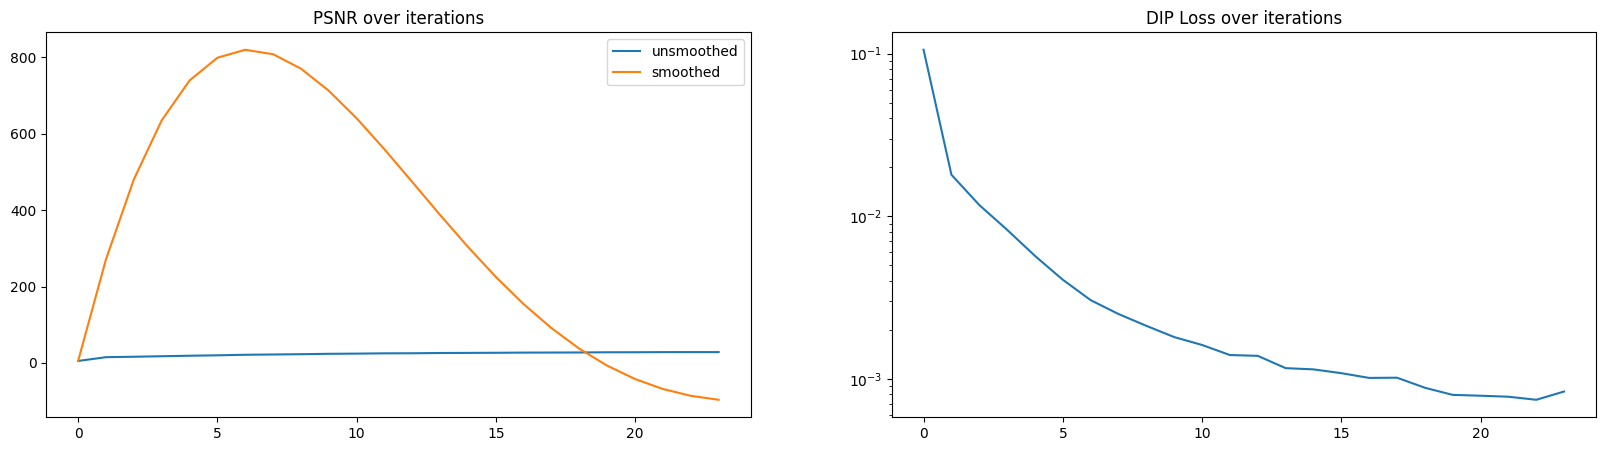

{'original_img': [[99, 100, 975, 97, 132]], 'attacked_img': [[132, 131, 134, 129, 749]], 'psnr_max_defense_img': [[132, 134, 131, 129, 99]], 'ses_defense_img': [[99, 132, 100, 975, 134]]}


In [38]:
file_name = "/home/bransthr/projects/aip-florian7/bransthr/DIPDefend/script_logpoint_ewc/attack_1_status.pt"
with open(file_name, "rb") as f:
    another_attack_data = torch.load(f, map_location="cpu", weights_only=False)
f.close()
diagnose_dip_defend(another_attack_data)

In [39]:
num_attacks_so_far = 3
cumulative_training_losses = [
    [] for _ in range(num_attacks_so_far)
]
for attack_num in range(num_attacks_so_far):
    file_name = f"/home/bransthr/projects/aip-florian7/bransthr/DIPDefend/script_logpoint_ewc/attack_{attack_num}_status.pt"
    with open(file_name, "rb") as f:
        curr_data = torch.load(f, map_location="cpu", weights_only=False)
        cumulative_training_losses[attack_num].extend(curr_data["defense_info"]['dip_losses'])
        if "past_example_losses" in curr_data['defense_info']:
            for past_idx, past_losses in enumerate(curr_data['defense_info']['past_example_losses']):
                cumulative_training_losses[past_idx].extend(past_losses)
    f.close()

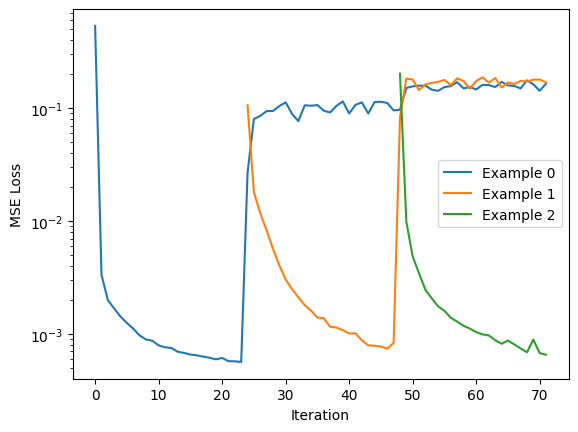

In [40]:
fig, ax = plt.subplots()
longest_attack_length = max(len(losses) for losses in cumulative_training_losses)
for attack_num in range(num_attacks_so_far):
    losses_to_plot = torch.tensor(cumulative_training_losses[attack_num]).numpy()
    ax.plot(
        np.arange(longest_attack_length - len(losses_to_plot), longest_attack_length),
        losses_to_plot,
        label=f"Example {attack_num}"
    )
ax.set_xlabel("Iteration")
ax.set_ylabel("MSE Loss")
ax.set_yscale("log")
ax.legend()

## Defense data

In [2]:
def diagnose_dip_defend(data):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    logits_dict = {}
    for k_idx, k in enumerate(
        ['original_img', 'attacked_img', 'psnr_max_defense_img', 'ses_defense_img']
    ):
        img_to_plot, logits = data[k]
        logits_dict[k] = logits
        if img_to_plot.ndim == 4:
            axs[k_idx].imshow(img_to_plot[0].transpose(1, 2, 0))
        else:
            axs[k_idx].imshow(img_to_plot.transpose(1, 2, 0))
        axs[k_idx].set_title(k)
    plt.show()
    psnr_unsmoothed = data["defense_info"]["series"]
    psnr_smoothed = data["defense_info"]["out_series"]
    dip_losses = torch.tensor(data["defense_info"]["dip_losses"]).numpy()

    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    axs[0].plot(psnr_unsmoothed, label="unsmoothed")
    axs[0].plot(psnr_smoothed, label="smoothed")
    axs[0].set_title("PSNR over iterations")
    axs[0].legend()
    axs[1].plot(dip_losses)
    axs[1].set_title("DIP Loss over iterations")
    axs[1].set_yscale("log")
    plt.show()
    top_5_classes = {
        k: torch.topk(torch.from_numpy(logits), 5).indices.tolist() for k, logits in logits_dict.items()
    }
    print(top_5_classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04939644..1.0226897].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10318977..1.0358605].


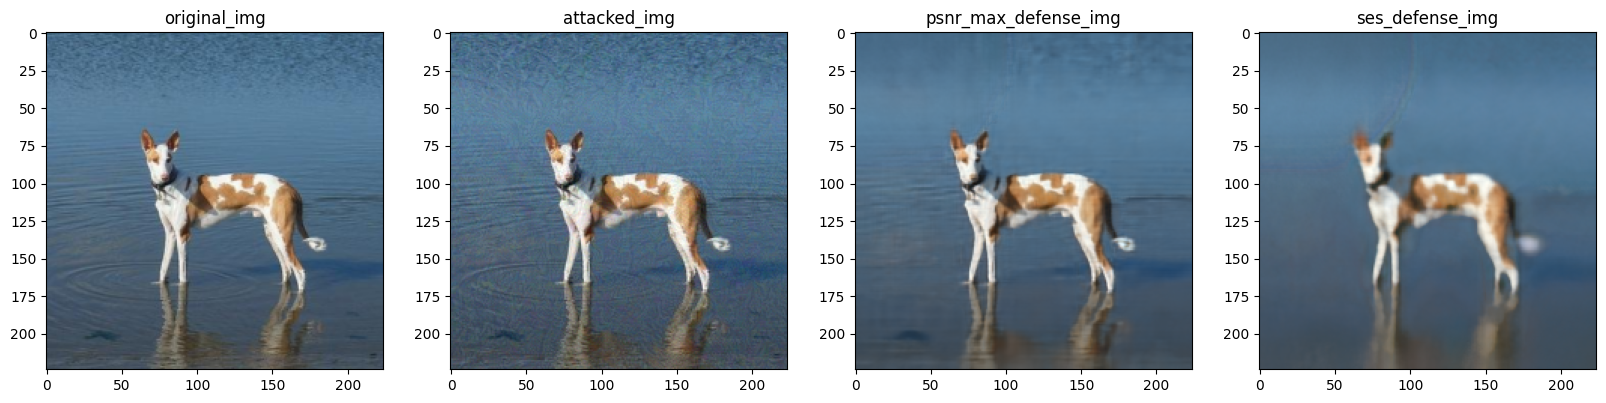

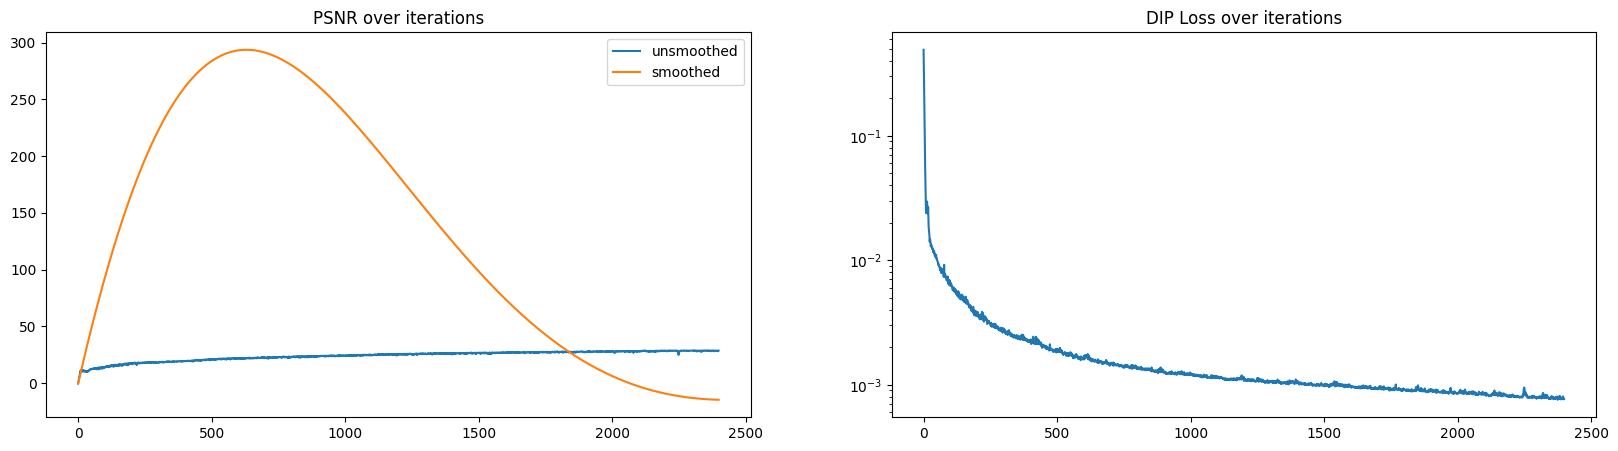

{'original_img': [[173, 253, 172, 171, 176]], 'attacked_img': [[280, 278, 277, 272, 335]], 'psnr_max_defense_img': [[173, 253, 172, 171, 167]], 'ses_defense_img': [[173, 171, 167, 172, 215]]}


In [3]:
file_name = "/home/bransthr/projects/aip-florian7/bransthr/DIPDefend/script_logpoint/attack_0_status.pt"
with open(file_name, "rb") as f:
    another_attack_data = torch.load(f, map_location="cpu", weights_only=False)
f.close()
diagnose_dip_defend(another_attack_data)
del another_attack_data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.006583537..1.0317229].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.008316161..1.0307058].


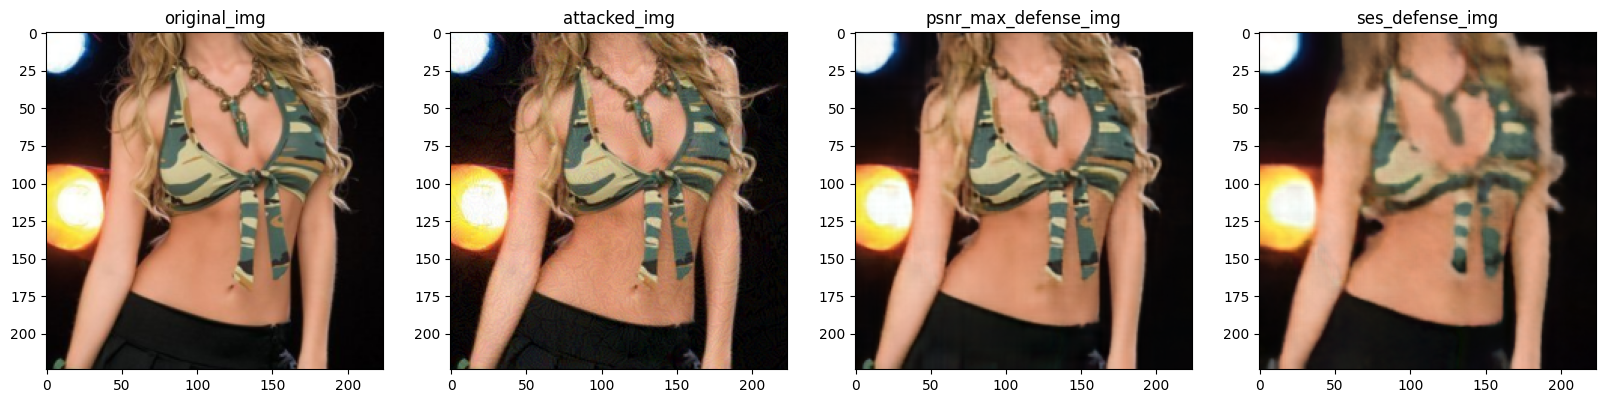

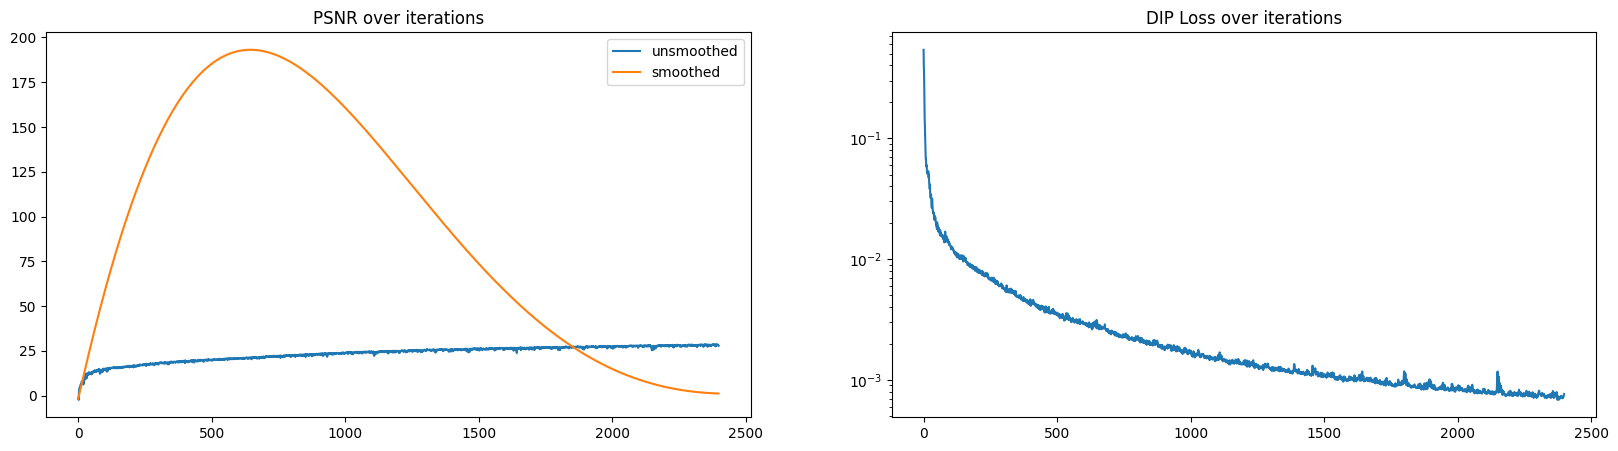

{'original_img': [[655, 638, 445, 459, 639]], 'attacked_img': [[890, 768, 805, 430, 429]], 'psnr_max_defense_img': [[459, 445, 638, 655, 890]], 'ses_defense_img': [[655, 842, 638, 465, 459]]}


In [4]:
file_name = "/home/bransthr/projects/aip-florian7/bransthr/DIPDefend/script_logpoint/attack_1_status.pt"
with open(file_name, "rb") as f:
    attack_data = torch.load(f, map_location="cpu", weights_only=False)
f.close()
diagnose_dip_defend(attack_data)
del attack_data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.03174063..1.0157763].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.007949013..1.0245707].


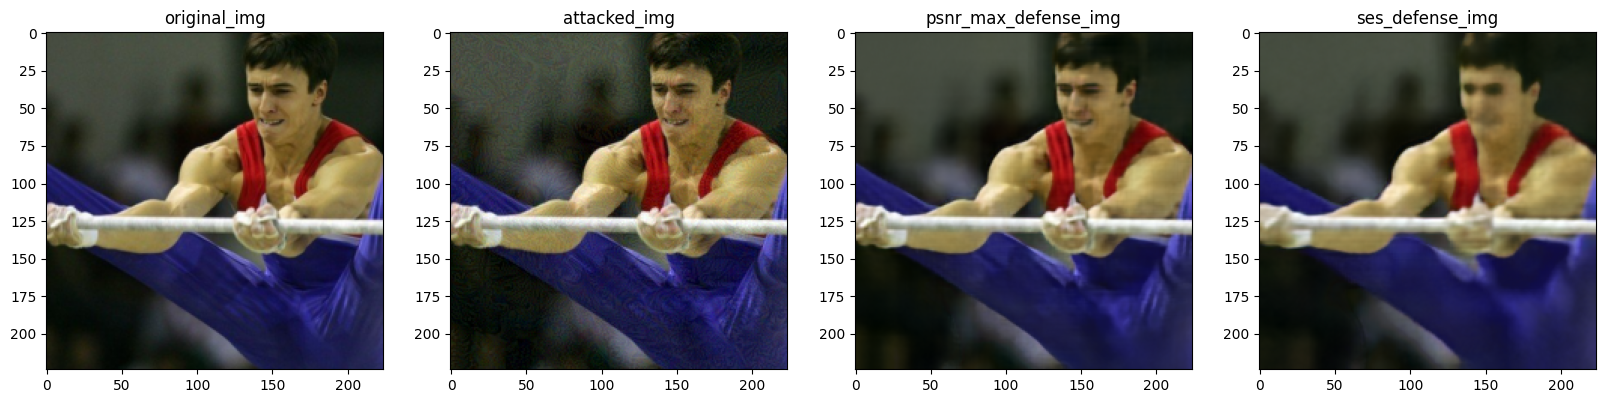

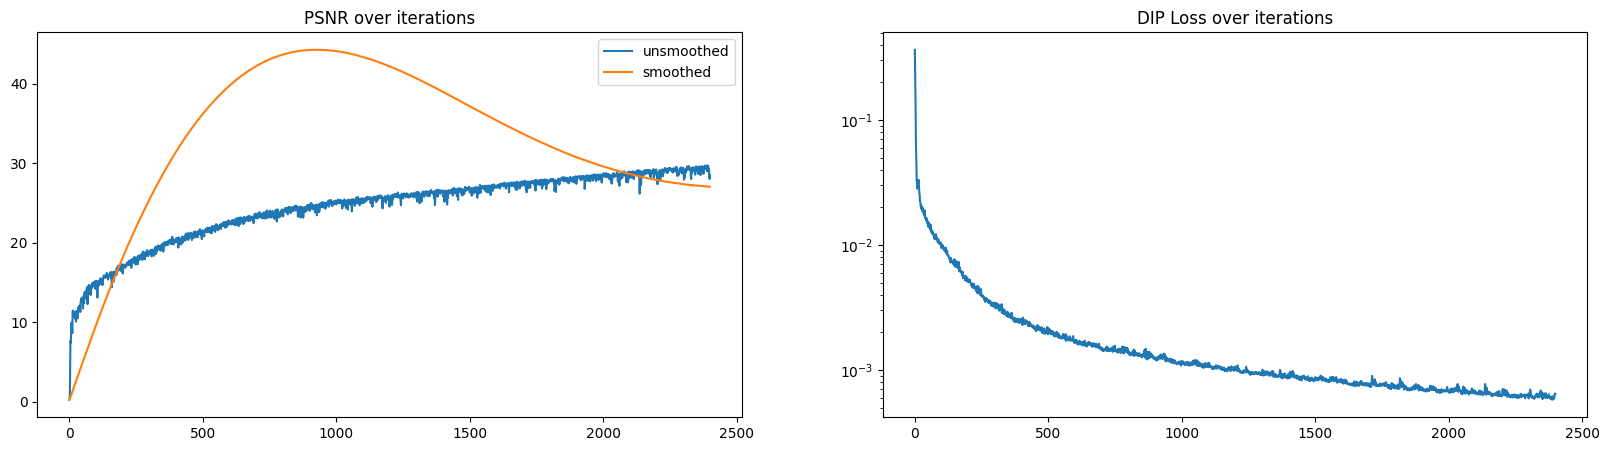

{'original_img': [[602, 702, 422, 416, 733]], 'attacked_img': [[702, 51, 542, 416, 395]], 'psnr_max_defense_img': [[602, 702, 416, 422, 733]], 'ses_defense_img': [[602, 702, 416, 422, 733]]}


In [5]:
file_name = "/home/bransthr/projects/aip-florian7/bransthr/DIPDefend/script_logpoint/attack_2_status.pt"
with open(file_name, "rb") as f:
    attack_data = torch.load(f, map_location="cpu", weights_only=False)
f.close()
diagnose_dip_defend(attack_data)
del attack_data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0049518966..1.026152].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.008220771..1.0495538].


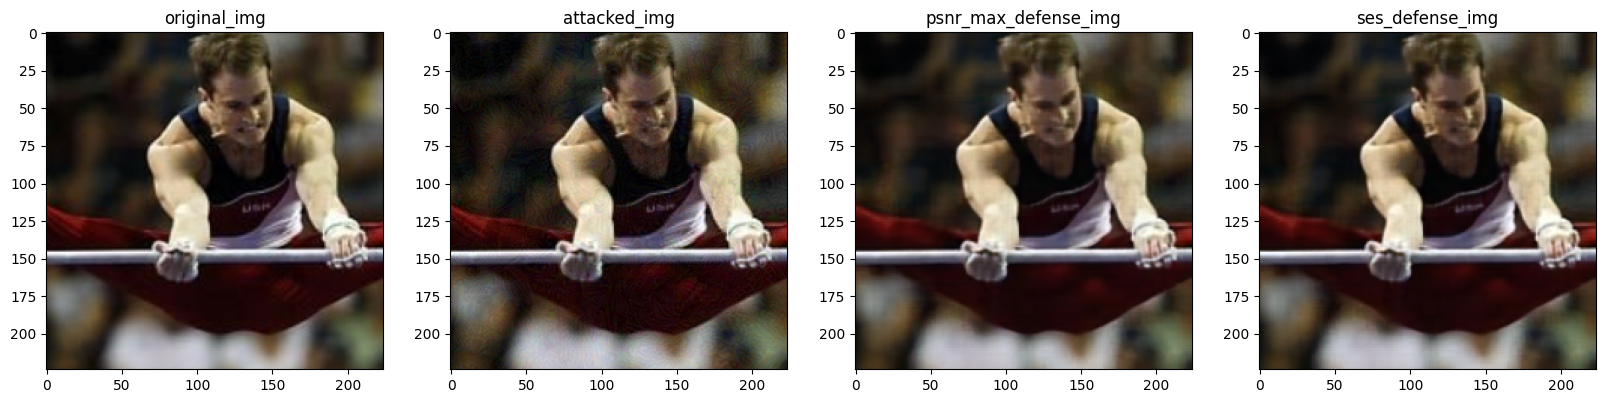

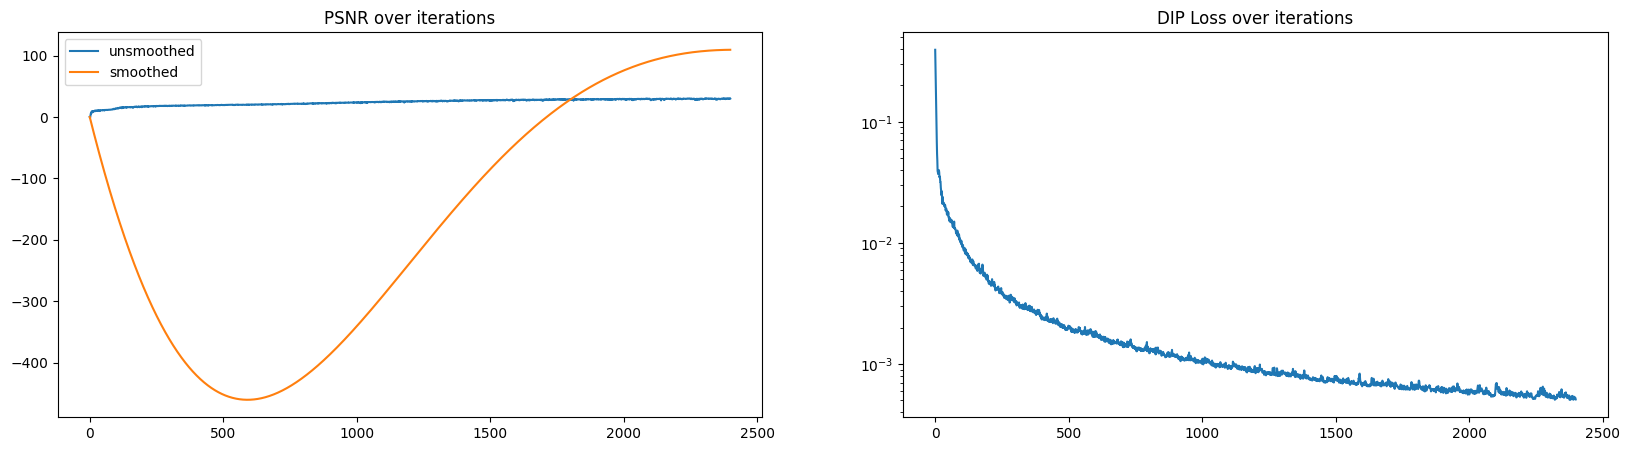

{'original_img': [[602, 702, 733, 416, 422]], 'attacked_img': [[702, 523, 542, 341, 733]], 'psnr_max_defense_img': [[602, 702, 422, 416, 733]], 'ses_defense_img': [[602, 702, 422, 416, 733]]}


In [6]:
file_name = "/home/bransthr/projects/aip-florian7/bransthr/DIPDefend/script_logpoint/attack_3_status.pt"
with open(file_name, "rb") as f:
    attack_data = torch.load(f, map_location="cpu", weights_only=False)
f.close()
diagnose_dip_defend(attack_data)
del attack_data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.032167874..1.0903821].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029608686..1.0590289].


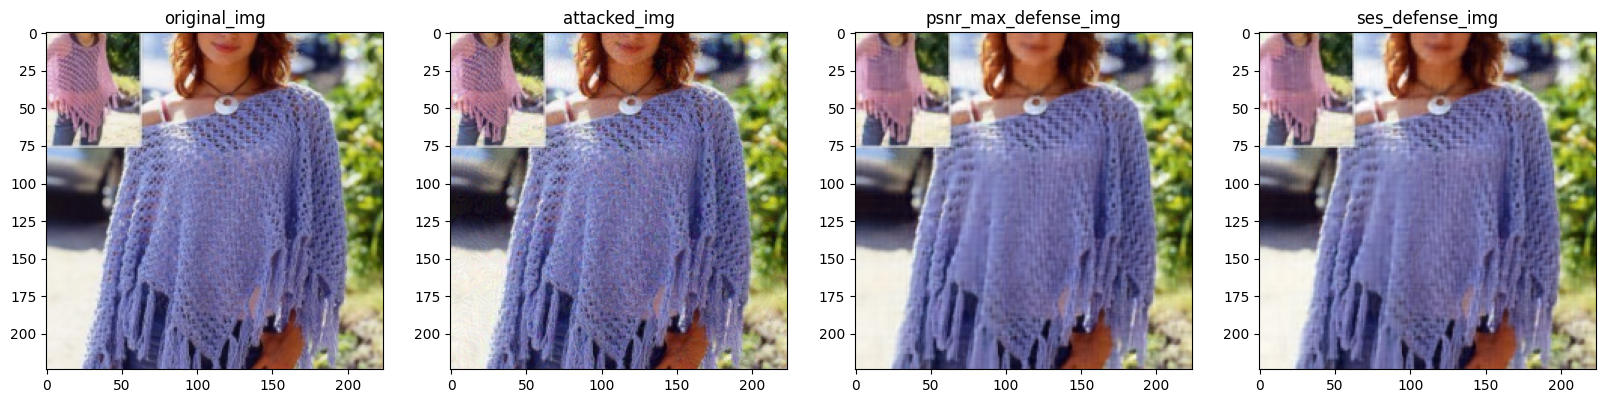

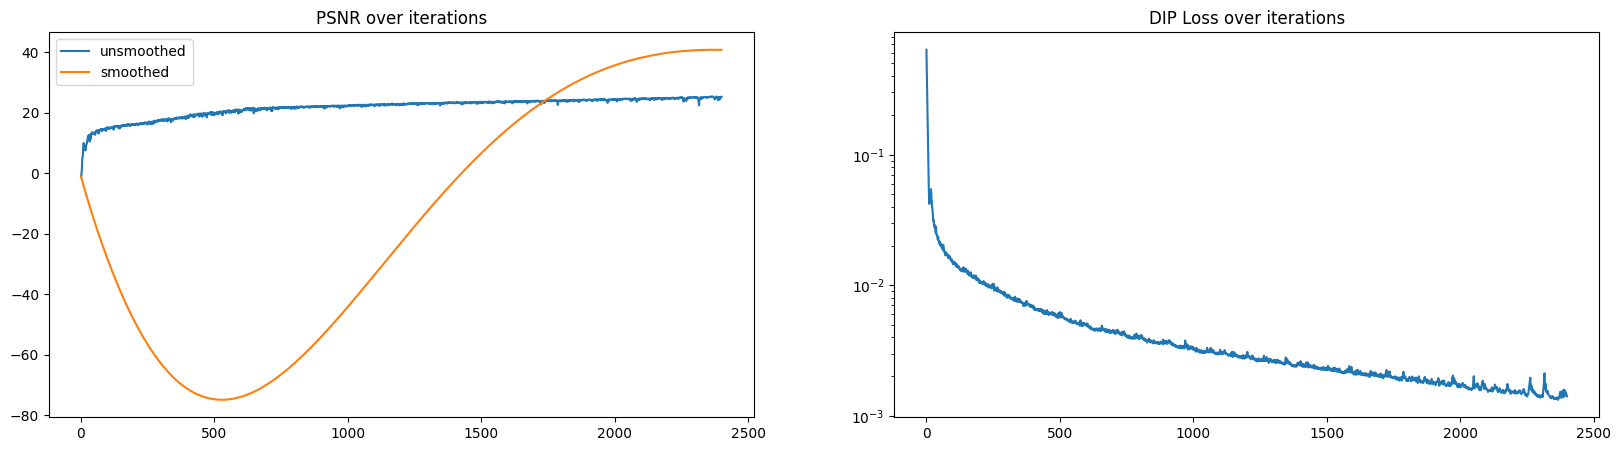

{'original_img': [[735, 824, 474, 911, 533]], 'attacked_img': [[474, 911, 824, 658, 806]], 'psnr_max_defense_img': [[735, 824, 474, 911, 775]], 'ses_defense_img': [[735, 824, 474, 911, 775]]}


In [7]:
file_name = "/home/bransthr/projects/aip-florian7/bransthr/DIPDefend/script_logpoint/attack_4_status.pt"
with open(file_name, "rb") as f:
    attack_data = torch.load(f, map_location="cpu", weights_only=False)
f.close()
diagnose_dip_defend(attack_data)
del attack_data

## Preliminary stuff

Text(0.5, 1.0, 'Original Image')

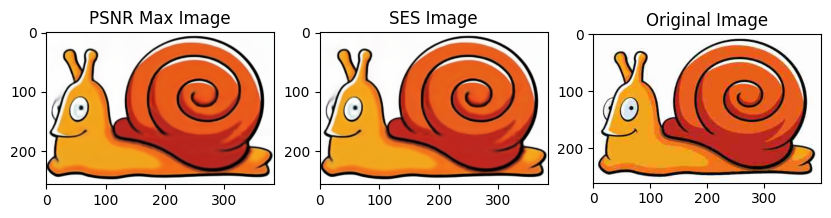

In [28]:
img_code = "snail"
original_img = plt.imread("./dataset/snail.jpg")
psnr_file_name = f"script_logpoint/PSNRMax_defended_{img_code}.npy"
ses_file_name = f"script_logpoint/SES_defended_{img_code}.npy"
psnr_data = np.load(psnr_file_name, allow_pickle=True)
ses_data = np.load(ses_file_name, allow_pickle=True)

figs, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(psnr_data.transpose(1, 2, 0))
axs[0].set_title("PSNR Max Image")
axs[1].imshow(ses_data.transpose(1, 2, 0))
axs[1].set_title("SES Image")
axs[2].imshow(original_img)
axs[2].set_title("Original Image")

Text(0.5, 1.0, 'Original Image')

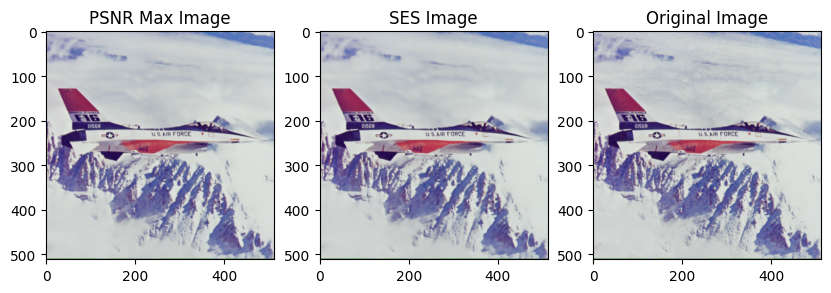

In [29]:
img_code = "F16_GT"
original_img = plt.imread("./dataset/F16_GT.png")
psnr_file_name = f"script_logpoint/PSNRMax_defended_{img_code}.npy"
ses_file_name = f"script_logpoint/SES_defended_{img_code}.npy"
psnr_data = np.load(psnr_file_name, allow_pickle=True)
ses_data = np.load(ses_file_name, allow_pickle=True)

figs, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(psnr_data.transpose(1, 2, 0))
axs[0].set_title("PSNR Max Image")
axs[1].imshow(ses_data.transpose(1, 2, 0))
axs[1].set_title("SES Image")
axs[2].imshow(original_img)
axs[2].set_title("Original Image")

In [31]:
plt.imread(
    "./dataset/mini-imagenet/images/n0287152500001298.jpg"
).shape

(375, 500, 3)